In [1]:
from preprocessing import load_stocks, get_day_features, get_shares_count, concat_columns, add_lag_columns, process_nans, split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# mean squared error has option to not square: https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

## Data processing

In [2]:
df = load_stocks()
df

AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close  \
Date                                                                        
2003-07-29 00:00:00-04:00    0.318576    0.319943    0.311444    0.314479   
2003-07-30 00:00:00-04:00    0.315238    0.317210    0.306131    0.307801   
2003-07-31 00:00:00-04:00    0.314782    0.324041    0.312202    0.319943   
2003-08-01 00:00:00-04:00    0.318728    0.322826    0.313264    0.314631   
2003-08-04 00:00:00-04:00    0.311595    0.326318    0.307801    0.321916   
...                               ...         ...         ...         ...   
2023-07-24 00:00:00-04:00  193.410004  194.910004  192.250000  192.750000   
2023-07-25 00:00:00-04:00  193.330002  194.440002  192.919998  193.619995   
2023-07-26 00:00:00-04:00  193.669998  195.639999  193.320007  194.500000   
2023-07-27 00:00:00-04:00  196.020004  197.199997  192.550003  193.220001   
2023-07-28 00:00:00-04:00  194.669998  196.619995  194.149399  195.830002   

                           AAPL_Volume  AAPL_Dividends  AAPL_Stock Splits  \
Date                                                                        
2003-07-29 00:00:00-04:00    197120000             0.0                0.0   
2003-07-30 00:00:00-04:00    173594400             0.0                0.0   
2003-07-31 00:00:00-04:00    301464800             0.0                0.0   
2003-08-01 00:00:00-04:00    149604000             0.0                0.0   
2003-08-04 00:00:00-04:00    230115200             0.0                0.0   
...                                ...             ...                ...   
2023-07-24 00:00:00-04:00     45377800             0.0                0.0   
2023-07-25 00:00:00-04:00     37283200             0.0                0.0   
2023-07-26 00:00:00-04:00     47471900             0.0                0.0   
2023-07-27 00:00:00-04:00     47460200             0.0                0.0   
2023-07-28 00:00:00-04:00     46977437             0.0                0.0   

                                              today   AMZN_Open   AMZN_High  \
Date                                                                          
2003-07-29 00:00:00-04:00 2003-07-29 00:00:00-04:00    2.099500    2.125000   
2003-07-30 00:00:00-04:00 2003-07-30 00:00:00-04:00    2.057500    2.063500   
2003-07-31 00:00:00-04:00 2003-07-31 00:00:00-04:00    2.067500    2.098500   
2003-08-01 00:00:00-04:00 2003-08-01 00:00:00-04:00    2.070500    2.081500   
2003-08-04 00:00:00-04:00 2003-08-04 00:00:00-04:00    1.985000    2.014500   
...                                             ...         ...         ...   
2023-07-24 00:00:00-04:00 2023-07-24 00:00:00-04:00  130.309998  131.660004   
2023-07-25 00:00:00-04:00 2023-07-25 00:00:00-04:00  129.309998  129.580002   
2023-07-26 00:00:00-04:00 2023-07-26 00:00:00-04:00  126.510002  129.080002   
2023-07-27 00:00:00-04:00 2023-07-27 00:00:00-04:00  131.000000  132.630005   
2023-07-28 00:00:00-04:00 2023-07-28 00:00:00-04:00  129.690002  133.009995   

                             AMZN_Low  AMZN_Close  AMZN_Volume  \
Date                                                             
2003-07-29 00:00:00-04:00    2.053000    2.069500    156510000   
2003-07-30 00:00:00-04:00    2.022500    2.033000    143326000   
2003-07-31 00:00:00-04:00    2.033500    2.082000    179414000   
2003-08-01 00:00:00-04:00    1.989000    2.001500    176104000   
2003-08-04 00:00:00-04:00    1.947500    1.982500    141088000   
...                               ...         ...          ...   
2023-07-24 00:00:00-04:00  128.350006  128.800003     45591100   
2023-07-25 00:00:00-04:00  128.529999  129.130005     39236700   
2023-07-26 00:00:00-04:00  126.110001  128.149994     53910100   
2023-07-27 00:00:00-04:00  127.790001  128.250000     52610700   
2023-07-28 00:00:00-04:00  129.330002  132.210007     45962738   

                           AMZN_Dividends  AMZN_Stock Splits  
Date                                                          
2003-07-29 

In [3]:
shares_count = get_shares_count(df, tickers=["AAPL", "AMZN"])
shares_count

AAPL_shares_count  AMZN_shares_count
Date                                                           
2003-07-29 00:00:00-04:00         5575330000          468762000
2003-07-30 00:00:00-04:00         5575330000          468762000
2003-07-31 00:00:00-04:00         5575330000          468762000
2003-08-01 00:00:00-04:00         5575330000          468762000
2003-08-04 00:00:00-04:00         5575330000          468762000
...                                      ...                ...
2023-07-24 00:00:00-04:00        15728700416        10260400128
2023-07-25 00:00:00-04:00        15728700416        10260400128
2023-07-26 00:00:00-04:00        15728700416        10260400128
2023-07-27 00:00:00-04:00        15728700416        10260400128
2023-07-28 00:00:00-04:00        15728700416        10260400128

[5035 rows x 2 columns]

In [4]:
df = concat_columns(df, shares_count)
df

AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close  \
Date                                                                        
2003-07-29 00:00:00-04:00    0.318576    0.319943    0.311444    0.314479   
2003-07-30 00:00:00-04:00    0.315238    0.317210    0.306131    0.307801   
2003-07-31 00:00:00-04:00    0.314782    0.324041    0.312202    0.319943   
2003-08-01 00:00:00-04:00    0.318728    0.322826    0.313264    0.314631   
2003-08-04 00:00:00-04:00    0.311595    0.326318    0.307801    0.321916   
...                               ...         ...         ...         ...   
2023-07-24 00:00:00-04:00  193.410004  194.910004  192.250000  192.750000   
2023-07-25 00:00:00-04:00  193.330002  194.440002  192.919998  193.619995   
2023-07-26 00:00:00-04:00  193.669998  195.639999  193.320007  194.500000   
2023-07-27 00:00:00-04:00  196.020004  197.199997  192.550003  193.220001   
2023-07-28 00:00:00-04:00  194.669998  196.619995  194.149399  195.830002   

                           AAPL_Volume  AAPL_Dividends  AAPL_Stock Splits  \
Date                                                                        
2003-07-29 00:00:00-04:00    197120000             0.0                0.0   
2003-07-30 00:00:00-04:00    173594400             0.0                0.0   
2003-07-31 00:00:00-04:00    301464800             0.0                0.0   
2003-08-01 00:00:00-04:00    149604000             0.0                0.0   
2003-08-04 00:00:00-04:00    230115200             0.0                0.0   
...                                ...             ...                ...   
2023-07-24 00:00:00-04:00     45377800             0.0                0.0   
2023-07-25 00:00:00-04:00     37283200             0.0                0.0   
2023-07-26 00:00:00-04:00     47471900             0.0                0.0   
2023-07-27 00:00:00-04:00     47460200             0.0                0.0   
2023-07-28 00:00:00-04:00     46977437             0.0                0.0   

                                              today   AMZN_Open   AMZN_High  \
Date                                                                          
2003-07-29 00:00:00-04:00 2003-07-29 00:00:00-04:00    2.099500    2.125000   
2003-07-30 00:00:00-04:00 2003-07-30 00:00:00-04:00    2.057500    2.063500   
2003-07-31 00:00:00-04:00 2003-07-31 00:00:00-04:00    2.067500    2.098500   
2003-08-01 00:00:00-04:00 2003-08-01 00:00:00-04:00    2.070500    2.081500   
2003-08-04 00:00:00-04:00 2003-08-04 00:00:00-04:00    1.985000    2.014500   
...                                             ...         ...         ...   
2023-07-24 00:00:00-04:00 2023-07-24 00:00:00-04:00  130.309998  131.660004   
2023-07-25 00:00:00-04:00 2023-07-25 00:00:00-04:00  129.309998  129.580002   
2023-07-26 00:00:00-04:00 2023-07-26 00:00:00-04:00  126.510002  129.080002   
2023-07-27 00:00:00-04:00 2023-07-27 00:00:00-04:00  131.000000  132.630005   
2023-07-28 00:00:00-04:00 2023-07-28 00:00:00-04:00  129.690002  133.009995   

                             AMZN_Low  AMZN_Close  AMZN_Volume  \
Date                                                             
2003-07-29 00:00:00-04:00    2.053000    2.069500    156510000   
2003-07-30 00:00:00-04:00    2.022500    2.033000    143326000   
2003-07-31 00:00:00-04:00    2.033500    2.082000    179414000   
2003-08-01 00:00:00-04:00    1.989000    2.001500    176104000   
2003-08-04 00:00:00-04:00    1.947500    1.982500    141088000   
...                               ...         ...          ...   
2023-07-24 00:00:00-04:00  128.350006  128.800003     45591100   
2023-07-25 00:00:00-04:00  128.529999  129.130005     39236700   
2023-07-26 00:00:00-04:00  126.110001  128.149994     53910100   
2023-07-27 00:00:00-04:00  127.790001  128.250000     52610700   
2023-07-28 00:00:00-04:00  129.330002  132.210007     45962738   

                           AMZN_Dividends  AMZN_Stock Splits  \
Date                                                           
2003-07-2

In [5]:
day_df = get_day_features(df)
day_df

weekday_0  weekday_1  weekday_2  weekday_3  \
Date                                                                    
2003-07-29 00:00:00-04:00          0          1          0          0   
2003-07-30 00:00:00-04:00          0          0          1          0   
2003-07-31 00:00:00-04:00          0          0          0          1   
2003-08-01 00:00:00-04:00          0          0          0          0   
2003-08-04 00:00:00-04:00          1          0          0          0   
...                              ...        ...        ...        ...   
2023-07-24 00:00:00-04:00          1          0          0          0   
2023-07-25 00:00:00-04:00          0          1          0          0   
2023-07-26 00:00:00-04:00          0          0          1          0   
2023-07-27 00:00:00-04:00          0          0          0          1   
2023-07-28 00:00:00-04:00          0          0          0          0   

                           weekday_4  month_1  month_2  month_3  month_4  \
Date                                                                       
2003-07-29 00:00:00-04:00          0        0        0        0        0   
2003-07-30 00:00:00-04:00          0        0        0        0        0   
2003-07-31 00:00:00-04:00          0        0        0        0        0   
2003-08-01 00:00:00-04:00          1        0        0        0        0   
2003-08-04 00:00:00-04:00          0        0        0        0        0   
...                              ...      ...      ...      ...      ...   
2023-07-24 00:00:00-04:00          0        0        0        0        0   
2023-07-25 00:00:00-04:00          0        0        0        0        0   
2023-07-26 00:00:00-04:00          0        0        0        0        0   
2023-07-27 00:00:00-04:00          0        0        0        0        0   
2023-07-28 00:00:00-04:00          1        0        0        0        0   

                           month_5  ...  day_26  day_27  day_28  day_29  \
Date                                ...                                   
2003-07-29 00:00:00-04:00        0  ...       0       0       0       1   
2003-07-30 00:00:00-04:00        0  ...       0       0       0       0   
2003-07-31 00:00:00-04:00        0  ...       0       0       0       0   
2003-08-01 00:00:00-04:00        0  ...       0       0       0       0   
2003-08-04 00:00:00-04:00        0  ...       0       0       0       0   
...                            ...  ...     ...     ...     ...     ...   
2023-07-24 00:00:00-04:00        0  ...       0       0       0       0   
2023-07-25 00:00:00-04:00        0  ...       0       0       0       0   
2023-07-26 00:00:00-04:00        0  ...       1       0       0       0   
2023-07-27 00:00:00-04:00        0  ...       0       1       0       0   
2023-07-28 00:00:00-04:00        0  ...       0       0       1       0   

                           day_30  day_31  week_0  week_1  week_2  week_3  
Date                                                                       
2003-07-29 00:00:00-04:00       0       0       0       0       0       1  
2003-07-30 00:00:00-04:00       1       0       0       0       0       1  
2003-07-31 00:00:00-04:00       0       1       0       0       0       1  
2003-08-01 00:00:00-04:00       0       0       0       0       0       1  
2003-08-04 00:00:00-04:00       0       0       1       0       0       0  
...                           ...     ...     ...     ...     ...     ...  
2023-07-24 00:00:00-04:00       0       0       0       0       1       0  
2023-07-25 00:00:00-04:00       0       0       0       0       1       0  
2023-07-26 00:00:00-04:00       0       0       0       0       1       0  
2023-07-27 00:00:00-04:00       0       0       0       0       1       0  
2023-07-28 00:00:00-04:00       0       0       0       0       1       0  

[5035 rows x 52 columns]

In [6]:
df = concat_columns(df, day_df)
df

AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close  \
Date                                                                        
2003-07-29 00:00:00-04:00    0.318576    0.319943    0.311444    0.314479   
2003-07-30 00:00:00-04:00    0.315238    0.317210    0.306131    0.307801   
2003-07-31 00:00:00-04:00    0.314782    0.324041    0.312202    0.319943   
2003-08-01 00:00:00-04:00    0.318728    0.322826    0.313264    0.314631   
2003-08-04 00:00:00-04:00    0.311595    0.326318    0.307801    0.321916   
...                               ...         ...         ...         ...   
2023-07-24 00:00:00-04:00  193.410004  194.910004  192.250000  192.750000   
2023-07-25 00:00:00-04:00  193.330002  194.440002  192.919998  193.619995   
2023-07-26 00:00:00-04:00  193.669998  195.639999  193.320007  194.500000   
2023-07-27 00:00:00-04:00  196.020004  197.199997  192.550003  193.220001   
2023-07-28 00:00:00-04:00  194.669998  196.619995  194.149399  195.830002   

                           AAPL_Volume  AAPL_Dividends  AAPL_Stock Splits  \
Date                                                                        
2003-07-29 00:00:00-04:00    197120000             0.0                0.0   
2003-07-30 00:00:00-04:00    173594400             0.0                0.0   
2003-07-31 00:00:00-04:00    301464800             0.0                0.0   
2003-08-01 00:00:00-04:00    149604000             0.0                0.0   
2003-08-04 00:00:00-04:00    230115200             0.0                0.0   
...                                ...             ...                ...   
2023-07-24 00:00:00-04:00     45377800             0.0                0.0   
2023-07-25 00:00:00-04:00     37283200             0.0                0.0   
2023-07-26 00:00:00-04:00     47471900             0.0                0.0   
2023-07-27 00:00:00-04:00     47460200             0.0                0.0   
2023-07-28 00:00:00-04:00     46977437             0.0                0.0   

                                              today   AMZN_Open   AMZN_High  \
Date                                                                          
2003-07-29 00:00:00-04:00 2003-07-29 00:00:00-04:00    2.099500    2.125000   
2003-07-30 00:00:00-04:00 2003-07-30 00:00:00-04:00    2.057500    2.063500   
2003-07-31 00:00:00-04:00 2003-07-31 00:00:00-04:00    2.067500    2.098500   
2003-08-01 00:00:00-04:00 2003-08-01 00:00:00-04:00    2.070500    2.081500   
2003-08-04 00:00:00-04:00 2003-08-04 00:00:00-04:00    1.985000    2.014500   
...                                             ...         ...         ...   
2023-07-24 00:00:00-04:00 2023-07-24 00:00:00-04:00  130.309998  131.660004   
2023-07-25 00:00:00-04:00 2023-07-25 00:00:00-04:00  129.309998  129.580002   
2023-07-26 00:00:00-04:00 2023-07-26 00:00:00-04:00  126.510002  129.080002   
2023-07-27 00:00:00-04:00 2023-07-27 00:00:00-04:00  131.000000  132.630005   
2023-07-28 00:00:00-04:00 2023-07-28 00:00:00-04:00  129.690002  133.009995   

                           ...  day_26  day_27  day_28  day_29  day_30  \
Date                       ...                                           
2003-07-29 00:00:00-04:00  ...       0       0       0       1       0   
2003-07-30 00:00:00-04:00  ...       0       0       0       0       1   
2003-07-31 00:00:00-04:00  ...       0       0       0       0       0   
2003-08-01 00:00:00-04:00  ...       0       0       0       0       0   
2003-08-04 00:00:00-04:00  ...       0       0       0       0       0   
...                        ...     ...     ...     ...     ...     ...   
2023-07-24 00:00:00-04:00  ...       0       0       0       0       0   
2023-07-25 00:00:00-04:00  ...       0       0       0       0       0   
2023-07-26 00:00:00-04:00  ...       1       0       0       0       0   
2023-07-27 00:00:00-04:00  ...       0       1       0       0       0   
2023-07-28 00:00:00-04:00  ...       0       0       1       0       0   

                           day_31

In [7]:
df = add_lag_columns(df, 7)
df

/Users/sebastianlarson/Dev/stock_prediction/preprocessing.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data2[column+'_lag_'+str(i)] = data[column].shift(i)
/Users/sebastianlarson/Dev/stock_prediction/preprocessing.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data2[column+'_lag_'+str(i)] = data[column].shift(i)
/Users/sebastianlarson/Dev/stock_prediction/preprocessing.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close  \
Date                                                                        
2003-07-29 00:00:00-04:00    0.318576    0.319943    0.311444    0.314479   
2003-07-30 00:00:00-04:00    0.315238    0.317210    0.306131    0.307801   
2003-07-31 00:00:00-04:00    0.314782    0.324041    0.312202    0.319943   
2003-08-01 00:00:00-04:00    0.318728    0.322826    0.313264    0.314631   
2003-08-04 00:00:00-04:00    0.311595    0.326318    0.307801    0.321916   
...                               ...         ...         ...         ...   
2023-07-24 00:00:00-04:00  193.410004  194.910004  192.250000  192.750000   
2023-07-25 00:00:00-04:00  193.330002  194.440002  192.919998  193.619995   
2023-07-26 00:00:00-04:00  193.669998  195.639999  193.320007  194.500000   
2023-07-27 00:00:00-04:00  196.020004  197.199997  192.550003  193.220001   
2023-07-28 00:00:00-04:00  194.669998  196.619995  194.149399  195.830002   

                           AAPL_Volume  AAPL_Dividends  AAPL_Stock Splits  \
Date                                                                        
2003-07-29 00:00:00-04:00    197120000             0.0                0.0   
2003-07-30 00:00:00-04:00    173594400             0.0                0.0   
2003-07-31 00:00:00-04:00    301464800             0.0                0.0   
2003-08-01 00:00:00-04:00    149604000             0.0                0.0   
2003-08-04 00:00:00-04:00    230115200             0.0                0.0   
...                                ...             ...                ...   
2023-07-24 00:00:00-04:00     45377800             0.0                0.0   
2023-07-25 00:00:00-04:00     37283200             0.0                0.0   
2023-07-26 00:00:00-04:00     47471900             0.0                0.0   
2023-07-27 00:00:00-04:00     47460200             0.0                0.0   
2023-07-28 00:00:00-04:00     46977437             0.0                0.0   

                                              today   AMZN_Open   AMZN_High  \
Date                                                                          
2003-07-29 00:00:00-04:00 2003-07-29 00:00:00-04:00    2.099500    2.125000   
2003-07-30 00:00:00-04:00 2003-07-30 00:00:00-04:00    2.057500    2.063500   
2003-07-31 00:00:00-04:00 2003-07-31 00:00:00-04:00    2.067500    2.098500   
2003-08-01 00:00:00-04:00 2003-08-01 00:00:00-04:00    2.070500    2.081500   
2003-08-04 00:00:00-04:00 2003-08-04 00:00:00-04:00    1.985000    2.014500   
...                                             ...         ...         ...   
2023-07-24 00:00:00-04:00 2023-07-24 00:00:00-04:00  130.309998  131.660004   
2023-07-25 00:00:00-04:00 2023-07-25 00:00:00-04:00  129.309998  129.580002   
2023-07-26 00:00:00-04:00 2023-07-26 00:00:00-04:00  126.510002  129.080002   
2023-07-27 00:00:00-04:00 2023-07-27 00:00:00-04:00  131.000000  132.630005   
2023-07-28 00:00:00-04:00 2023-07-28 00:00:00-04:00  129.690002  133.009995   

                           ...  day_27_lag_6  day_28_lag_6  day_29_lag_6  \
Date                       ...                                             
2003-07-29 00:00:00-04:00  ...           NaN           NaN           NaN   
2003-07-30 00:00:00-04:00  ...           NaN           NaN           NaN   
2003-07-31 00:00:00-04:00  ...           NaN           NaN           NaN   
2003-08-01 00:00:00-04:00  ...           NaN           NaN           NaN   
2003-08-04 00:00:00-04:00  ...           NaN           NaN           NaN   
...                        ...           ...           ...           ...   
2023-07-24 00:00:00-04:00  ...           0.0           0.0           0.0   
2023-07-25 00:00:00-04:00  ...           0.0           0.0           0.0   
2023-07-26 00:00:00-04:00  ...           0.0           0.0           0.0   
2023-07-27 00:00:00-04:00  ...           0.0           0.0           0.0   
2023-07-28 00:00:00-04:00  ...           0.0           0.0           0.0   

       

In [8]:
date_drop_cols = [col for col in df.columns if 'today' in col]

# set is used due to potential duplicates
date_drop_cols = set(date_drop_cols)

print('Dropping columns:')
print(date_drop_cols)
df = df.drop(columns=date_drop_cols, axis=0)

df

Dropping columns:
{'today_lag_5', 'today_lag_6', 'today_lag_1', 'today_lag_4', 'today_lag_3', 'today_lag_2', 'today'}


AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close  \
Date                                                                        
2003-07-29 00:00:00-04:00    0.318576    0.319943    0.311444    0.314479   
2003-07-30 00:00:00-04:00    0.315238    0.317210    0.306131    0.307801   
2003-07-31 00:00:00-04:00    0.314782    0.324041    0.312202    0.319943   
2003-08-01 00:00:00-04:00    0.318728    0.322826    0.313264    0.314631   
2003-08-04 00:00:00-04:00    0.311595    0.326318    0.307801    0.321916   
...                               ...         ...         ...         ...   
2023-07-24 00:00:00-04:00  193.410004  194.910004  192.250000  192.750000   
2023-07-25 00:00:00-04:00  193.330002  194.440002  192.919998  193.619995   
2023-07-26 00:00:00-04:00  193.669998  195.639999  193.320007  194.500000   
2023-07-27 00:00:00-04:00  196.020004  197.199997  192.550003  193.220001   
2023-07-28 00:00:00-04:00  194.669998  196.619995  194.149399  195.830002   

                           AAPL_Volume  AAPL_Dividends  AAPL_Stock Splits  \
Date                                                                        
2003-07-29 00:00:00-04:00    197120000             0.0                0.0   
2003-07-30 00:00:00-04:00    173594400             0.0                0.0   
2003-07-31 00:00:00-04:00    301464800             0.0                0.0   
2003-08-01 00:00:00-04:00    149604000             0.0                0.0   
2003-08-04 00:00:00-04:00    230115200             0.0                0.0   
...                                ...             ...                ...   
2023-07-24 00:00:00-04:00     45377800             0.0                0.0   
2023-07-25 00:00:00-04:00     37283200             0.0                0.0   
2023-07-26 00:00:00-04:00     47471900             0.0                0.0   
2023-07-27 00:00:00-04:00     47460200             0.0                0.0   
2023-07-28 00:00:00-04:00     46977437             0.0                0.0   

                            AMZN_Open   AMZN_High    AMZN_Low  ...  \
Date                                                           ...   
2003-07-29 00:00:00-04:00    2.099500    2.125000    2.053000  ...   
2003-07-30 00:00:00-04:00    2.057500    2.063500    2.022500  ...   
2003-07-31 00:00:00-04:00    2.067500    2.098500    2.033500  ...   
2003-08-01 00:00:00-04:00    2.070500    2.081500    1.989000  ...   
2003-08-04 00:00:00-04:00    1.985000    2.014500    1.947500  ...   
...                               ...         ...         ...  ...   
2023-07-24 00:00:00-04:00  130.309998  131.660004  128.350006  ...   
2023-07-25 00:00:00-04:00  129.309998  129.580002  128.529999  ...   
2023-07-26 00:00:00-04:00  126.510002  129.080002  126.110001  ...   
2023-07-27 00:00:00-04:00  131.000000  132.630005  127.790001  ...   
2023-07-28 00:00:00-04:00  129.690002  133.009995  129.330002  ...   

                           day_27_lag_6  day_28_lag_6  day_29_lag_6  \
Date                                                                  
2003-07-29 00:00:00-04:00           NaN           NaN           NaN   
2003-07-30 00:00:00-04:00           NaN           NaN           NaN   
2003-07-31 00:00:00-04:00           NaN           NaN           NaN   
2003-08-01 00:00:00-04:00           NaN           NaN           NaN   
2003-08-04 00:00:00-04:00           NaN           NaN           NaN   
...                                 ...           ...           ...   
2023-07-24 00:00:00-04:00           0.0           0.0           0.0   
2023-07-25 00:00:00-04:00           0.0           0.0           0.0   
2023-07-26 00:00:00-04:00           0.0           0.0           0.0   
2023-07-27 00:00:00-04:00           0.0           0.0           0.0   
2023-07-28 00:00:00-04:00           0.0           0.0           0.0   

                           day_30_lag_6  day_31_lag_6  week_0_lag_6  \
Date                                                                  
2003-07-29 00:00:00-04:00           NaN        

In [9]:
df = process_nans(df, 0)
df

AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close  \
Date                                                                        
2003-07-29 00:00:00-04:00    0.318576    0.319943    0.311444    0.314479   
2003-07-30 00:00:00-04:00    0.315238    0.317210    0.306131    0.307801   
2003-07-31 00:00:00-04:00    0.314782    0.324041    0.312202    0.319943   
2003-08-01 00:00:00-04:00    0.318728    0.322826    0.313264    0.314631   
2003-08-04 00:00:00-04:00    0.311595    0.326318    0.307801    0.321916   
...                               ...         ...         ...         ...   
2023-07-24 00:00:00-04:00  193.410004  194.910004  192.250000  192.750000   
2023-07-25 00:00:00-04:00  193.330002  194.440002  192.919998  193.619995   
2023-07-26 00:00:00-04:00  193.669998  195.639999  193.320007  194.500000   
2023-07-27 00:00:00-04:00  196.020004  197.199997  192.550003  193.220001   
2023-07-28 00:00:00-04:00  194.669998  196.619995  194.149399  195.830002   

                           AAPL_Volume  AAPL_Dividends  AAPL_Stock Splits  \
Date                                                                        
2003-07-29 00:00:00-04:00    197120000             0.0                0.0   
2003-07-30 00:00:00-04:00    173594400             0.0                0.0   
2003-07-31 00:00:00-04:00    301464800             0.0                0.0   
2003-08-01 00:00:00-04:00    149604000             0.0                0.0   
2003-08-04 00:00:00-04:00    230115200             0.0                0.0   
...                                ...             ...                ...   
2023-07-24 00:00:00-04:00     45377800             0.0                0.0   
2023-07-25 00:00:00-04:00     37283200             0.0                0.0   
2023-07-26 00:00:00-04:00     47471900             0.0                0.0   
2023-07-27 00:00:00-04:00     47460200             0.0                0.0   
2023-07-28 00:00:00-04:00     46977437             0.0                0.0   

                            AMZN_Open   AMZN_High    AMZN_Low  ...  \
Date                                                           ...   
2003-07-29 00:00:00-04:00    2.099500    2.125000    2.053000  ...   
2003-07-30 00:00:00-04:00    2.057500    2.063500    2.022500  ...   
2003-07-31 00:00:00-04:00    2.067500    2.098500    2.033500  ...   
2003-08-01 00:00:00-04:00    2.070500    2.081500    1.989000  ...   
2003-08-04 00:00:00-04:00    1.985000    2.014500    1.947500  ...   
...                               ...         ...         ...  ...   
2023-07-24 00:00:00-04:00  130.309998  131.660004  128.350006  ...   
2023-07-25 00:00:00-04:00  129.309998  129.580002  128.529999  ...   
2023-07-26 00:00:00-04:00  126.510002  129.080002  126.110001  ...   
2023-07-27 00:00:00-04:00  131.000000  132.630005  127.790001  ...   
2023-07-28 00:00:00-04:00  129.690002  133.009995  129.330002  ...   

                           day_27_lag_6_isna  day_28_lag_6_isna  \
Date                                                              
2003-07-29 00:00:00-04:00               True               True   
2003-07-30 00:00:00-04:00               True               True   
2003-07-31 00:00:00-04:00               True               True   
2003-08-01 00:00:00-04:00               True               True   
2003-08-04 00:00:00-04:00               True               True   
...                                      ...                ...   
2023-07-24 00:00:00-04:00              False              False   
2023-07-25 00:00:00-04:00              False              False   
2023-07-26 00:00:00-04:00              False              False   
2023-07-27 00:00:00-04:00              False              False   
2023-07-28 00:00:00-04:00              False              False   

                           day_29_lag_6_isna  day_30_lag_6_isna  \
Date                                                              
2003-07-29 00:00:00-04:00               True               True   
2003-07-30 00:00:00-04:00               

In [10]:
drop_cols = ["ds"]
for i in range(1, 7):
    drop_cols.append("ds_lag_"+str(i))
df = df.drop(columns=drop_cols)
X_train, X_test, y_train, y_test = split(data=df, split=0.8, y_cols=['AAPL_Open', 'AAPL_High', 'AAPL_Low', 'AAPL_Close', 'AAPL_Volume', 'AAPL_shares_count'], exclude_cols=[])

print('Lengths:')
print('X_train: ', str(len(X_train)))
print('X_test: ', str(len(X_test)))
print('y_train: ', str(len(y_train)))
print('y_test: ', str(len(y_test)))

Lengths:
X_train:  4028
X_test:  1007
y_train:  4028
y_test:  1007


In [11]:
'''
X_train.index = range(len(X_train.index))
X_test.index = range(len(X_test.index))
y_train.index = range(len(y_train.index))
y_test.index = range(len(y_test.index))
''''

In [12]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [13]:
preds = model.predict(X_test)
preds = pd.DataFrame(preds, columns=y_test.columns)

In [14]:
np.sqrt(((preds["AAPL_Close"].to_numpy() - y_test["AAPL_Close"].to_numpy()) ** 2).mean())

78.05073686836286

<AxesSubplot:>

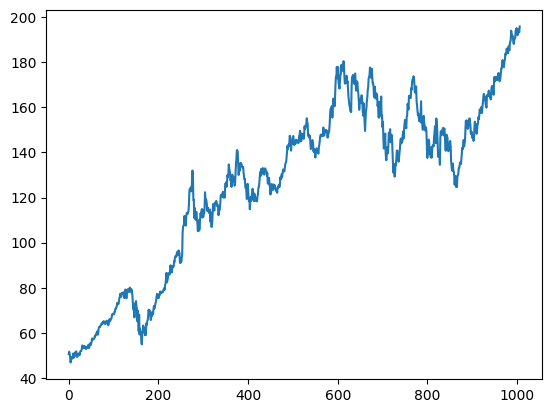

In [21]:
y_train['AAPL_Close'].plot()


Text(0, 0.5, 'AAPL Close')

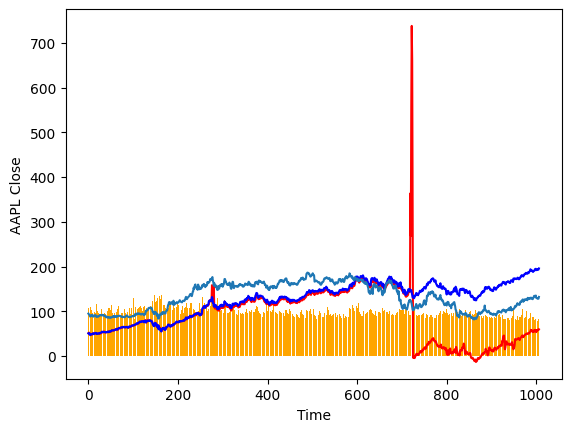

In [15]:
plt.plot(preds.index, preds.AAPL_Close, color="red")
plt.plot(y_test.index, y_test.AAPL_Close, color="blue")
plt.plot(X_test.index, X_test.AMZN_Close) # color is light blue
plt.bar(y_test.index, np.sqrt(np.sqrt(y_test.AAPL_Volume.to_numpy())), color="orange")

plt.plot()
plt.xlabel('Time')
plt.ylabel('AAPL Close')

In [16]:
df = load_stocks()
shares_count = get_shares_count(df, tickers=["AAPL", "AMZN"])
df = concat_shares_stock(shares_count, df)
df = add_lag_columns(df, 7)

date_drop_cols = [col for col in df.columns if 'today' in col]

# set is used due to potential duplicates
date_drop_cols = set(date_drop_cols)

print('Dropping columns:')
print(date_drop_cols)
df = df.drop(columns=date_drop_cols, axis=0)

df = process_nans(df, 0)

drop_cols = ["ds"]
for i in range(1, 7):
    drop_cols.append("ds_lag_"+str(i))
df = df.drop(columns=drop_cols)
X_train, X_test, y_train, y_test = split(data=df, split=0.8, y_cols=['AAPL_Open', 'AAPL_High', 'AAPL_Low', 'AAPL_Close', 'AAPL_Volume'], exclude_cols=[])

print('Lengths:')
print('X_train: ', str(len(X_train)))
print('X_test: ', str(len(X_test)))
print('y_train: ', str(len(y_train)))
print('y_test: ', str(len(y_test)))

X_train.index = range(len(X_train.index))
X_test.index = range(len(X_test.index))
y_train.index = range(len(y_train.index))
y_test.index = range(len(y_test.index))

NameError: name 'concat_shares_stock' is not defined

In [ ]:
model_no_day_features = LinearRegression()
model_no_day_features.fit(X=X_train, y=y_train)

LinearRegression()

In [ ]:
preds_no_day_features = model_no_day_features.predict(X_test)
preds_no_day_features = pd.DataFrame(preds_no_day_features, columns=y_test.columns)

In [ ]:
np.sqrt(((preds_no_day_features["AAPL_Close"].to_numpy() - y_test["AAPL_Close"].to_numpy()) ** 2).mean())

98.91275337984543

Text(0, 0.5, 'AAPL Close')

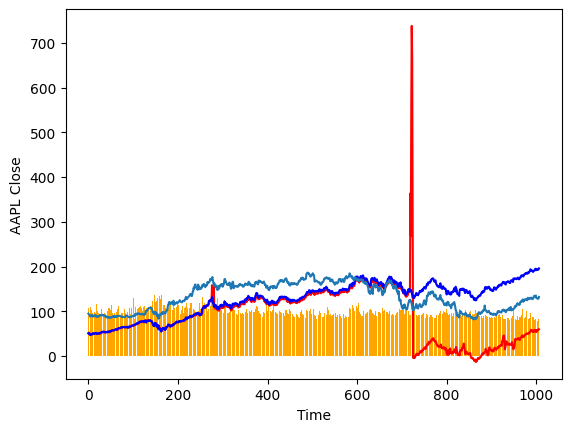

In [ ]:
plt.plot(preds.index, preds.AAPL_Close, color="red")
plt.plot(y_test.index, y_test.AAPL_Close, color="blue")
plt.plot(X_test.index, X_test.AMZN_Close) # color is light blue
plt.bar(y_test.index, np.sqrt(np.sqrt(y_test.AAPL_Volume.to_numpy())), color="orange")

plt.plot()
plt.xlabel('Time')
plt.ylabel('AAPL Close')

In [ ]:
d = X_train.dtypes.to_dict()
c = {d[k]:[] for k in d}
for i in d:
    c[d[i]].append(i)